In [1]:
#pip install imblearn 

In [ ]:
1. SMOTE
2. Forward and backward elimination

3. K-Means CLustering
4. KNN KNearest Neighbours

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)


# Data
The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe (1/0) a term deposit (variable y).
This dataset provides the customer information. It includes 41188 records and 21 fields.

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

16 - emp.var.rate: employment variation rate - (numeric)

17 - cons.price.idx: consumer price index - (numeric)

18 - cons.conf.idx: consumer confidence index - (numeric)

19 - euribor3m: euribor 3 month rate - (numeric)

20 - nr.employed: number of employees - (numeric)

y - has the client subscribed a term deposit? (binary: '1','0')

In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/madmashup/targeted-marketing-predictive-engine/master/banking.csv')
data.head(2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0


In [5]:
data.shape

(41188, 21)

In [6]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

#### Data Exploration

In [7]:
#analyse columns
data['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [8]:
data['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

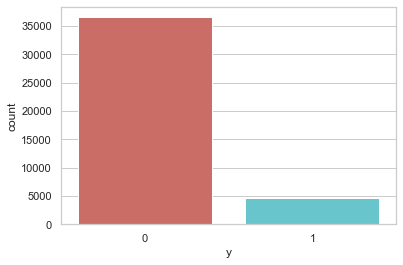

In [9]:
sns.countplot(x='y',data=data,palette='hls')
plt.show()

Observations : It's an imbalanced data set. Hence accuracy will not be a good model evaluator.

In [10]:
data['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [11]:
data['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [12]:
data['education'] = np.where(data['education'] == 'basic.9y', "Basic", data['education'])

data['education'] = np.where(data['education'] == 'basic.6y', "Basic", data['education'])

data['education'] = np.where(data['education'] == 'basic.4y', "Basic", data['education'])

In [13]:
data['education'].value_counts()

Basic                  12513
university.degree      12168
high.school             9515
professional.course     5243
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [14]:
#Analysis

data.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


In [15]:
#1 Observation - The mean age of people subscribing to term deposit is slightly higher

#2 duration - this attribute highly affects the output target (e.g., if duration=0 then y='no'). 

#3 p-days - P-days is undertanbly lower. Which means lower the pdays better the chances that the customer will subscribe t
#to the term deposit

In [16]:
data.groupby('job').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
job,,,,,,,,,,,
admin.,38.187296,254.312128,2.623489,954.319229,0.189023,0.015563,93.534054,-40.245433,3.550274,5164.125350,0.129726
blue-collar,39.555760,264.542360,2.558461,985.160363,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150,0.068943
entrepreneur,41.723214,263.267857,2.535714,981.267170,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530,0.085165
housemaid,45.500000,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623,0.100000
management,42.362859,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513,0.112175
retired,62.027326,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151,0.252326
self-employed,39.949331,264.142153,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384,0.104856
services,37.926430,258.398085,2.587805,979.974049,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126,0.081381
student,25.894857,283.683429,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086,0.314286


In [17]:
# retried people and student are highly likely to subscribe to term deposit

In [18]:
data.groupby('marital').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
marital,,,,,,,,,,,
divorced,44.899393,253.790330,2.61340,968.639853,0.168690,0.163985,93.606563,-40.707069,3.715603,5170.878643,0.103209
married,42.307165,257.438623,2.57281,967.247673,0.155608,0.183625,93.597367,-40.270659,3.745832,5171.848772,0.101573
single,33.158714,261.524378,2.53380,949.909578,0.211359,-0.167989,93.517300,-40.918698,3.317447,5155.199265,0.140041
unknown,40.275000,312.725000,3.18750,937.100000,0.275000,-0.221250,93.471250,-40.820000,3.313038,5157.393750,0.150000


In [19]:
data.groupby('education').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
education,,,,,,,,,,,
Basic,42.163910,263.043874,2.559498,974.877967,0.141053,0.191329,93.639933,-40.927595,3.729654,5172.014113,0.087029
high.school,37.998213,260.886810,2.568576,964.358382,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.994735,0.108355
illiterate,48.500000,276.777778,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778,0.222222
professional.course,40.080107,252.533855,2.586115,960.765974,0.163075,0.173012,93.569864,-40.124108,3.710457,5170.155979,0.113485
university.degree,38.879191,253.223373,2.563527,951.807692,0.192390,-0.028090,93.493466,-39.975805,3.529663,5163.226298,0.137245
unknown,43.481225,262.390526,2.596187,942.830734,0.226459,0.059099,93.658615,-39.877816,3.571098,5159.549509,0.145003


In [20]:
#massive difference in subscription rate for customers with basic education vs illetrates

#### Job as a chasretristic

In [21]:
pd.crosstab(data['job'],data['y'])

y,0,1
job,,
admin.,9070,1352
blue-collar,8616,638
entrepreneur,1332,124
housemaid,954,106
management,2596,328
retired,1286,434
self-employed,1272,149
services,3646,323
student,600,275


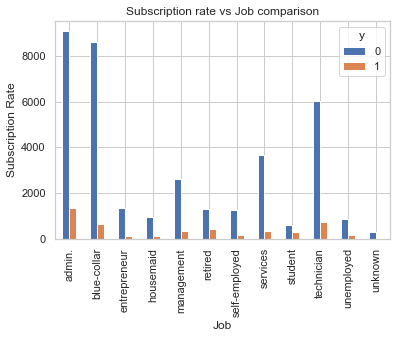

In [22]:
pd.crosstab(data['job'],data['y']).plot(kind='bar')
plt.title('Subscription rate vs Job comparison')
plt.xlabel('Job')
plt.ylabel('Subscription Rate')
plt.show()

#### Marital Status as a chasretristic

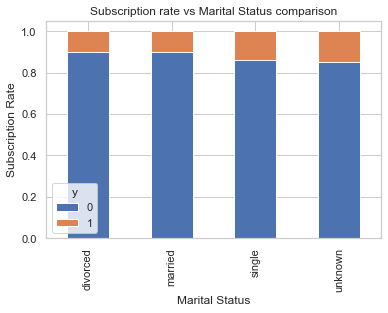

In [23]:
#Stacked bar chart
table = pd.crosstab(data['marital'],data['y'])
table.div(table.sum(1),axis=0).plot(kind='bar',stacked=True)
plt.title('Subscription rate vs Marital Status comparison')
plt.xlabel('Marital Status')
plt.ylabel('Subscription Rate')
plt.show()

In [24]:
table

y,0,1
marital,,
divorced,4136,476
married,22396,2532
single,9948,1620
unknown,68,12


In [25]:
4136 + 476

4612

In [26]:
(4136/4612),(476/4612)

(0.8967909800520382, 0.10320901994796183)

In [27]:
#div = division
table.div(table.sum(1),axis=0)

y,0,1
marital,,
divorced,0.896791,0.103209
married,0.898427,0.101573
single,0.859959,0.140041
unknown,0.850000,0.150000


#### Education

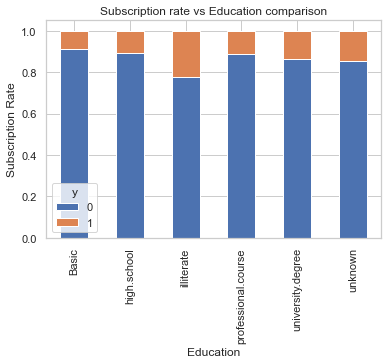

In [28]:
table = pd.crosstab(data['education'],data['y'])
table.div(table.sum(1),axis=0).plot(kind='bar',stacked=True)
plt.title('Subscription rate vs Education comparison')
plt.xlabel('Education')
plt.ylabel('Subscription Rate')
plt.show()

#### Pre-processing

In [29]:
data.head(2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,Basic,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0


In [30]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [31]:
categorical_columns_list = ['job', 'marital', 'education', 'default', 'housing',
                            'loan','contact', 'month', 'day_of_week', 'poutcome']

In [32]:
for column in categorical_columns_list:
    
    cat_list = pd.get_dummies(data[column],prefix=column) # creating dummy variables
    
    data1 = data.join(cat_list) # concatenating the dummy variables with the original dataframe
    
    data = data1

In [33]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,44,blue-collar,married,Basic,unknown,yes,no,cellular,aug,thu,...,0,0,0,0,1,0,0,0,1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,0,0,1,0,0,0,0,0,1,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,0,0,0,0,1,0,0,0,0,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,0,0,1,0,0,0,0,0,1,0
4,55,retired,married,Basic,no,yes,no,cellular,aug,fri,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,...,0,0,0,0,1,0,0,0,1,0
41184,31,housemaid,married,Basic,unknown,no,no,telephone,may,thu,...,0,0,0,0,1,0,0,0,1,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,...,0,0,0,0,0,0,1,0,1,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,...,1,0,0,0,0,1,0,0,1,0


In [34]:
#we need to deiscard the columns that are already converted into dummy
data_vars = data.columns.tolist()

# keep = []

# for column in data_vars:
    
#     if column not in categorical_columns_list:
        
#         keep.append(column)
        
        
keep = [column for column in data_vars if column not in categorical_columns_list]

In [35]:
len(keep)

62

In [36]:
data_final = data[keep]
data_final  # our processed dataframe

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,44,210,1,999,0,1.4,93.444,-36.1,4.963,5228.1,...,0,0,0,0,1,0,0,0,1,0
1,53,138,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,...,0,0,1,0,0,0,0,0,1,0
2,28,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,...,0,0,0,0,1,0,0,0,0,1
3,39,185,2,999,0,-1.8,93.075,-47.1,1.405,5099.1,...,0,0,1,0,0,0,0,0,1,0
4,55,137,1,3,1,-2.9,92.201,-31.4,0.869,5076.2,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,222,1,999,0,1.4,94.465,-41.8,4.866,5228.1,...,0,0,0,0,1,0,0,0,1,0
41184,31,196,2,999,0,1.1,93.994,-36.4,4.860,5191.0,...,0,0,0,0,1,0,0,0,1,0
41185,42,62,3,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,0,0,0,1,0,1,0
41186,48,200,2,999,0,-3.4,92.431,-26.9,0.742,5017.5,...,1,0,0,0,0,1,0,0,1,0


In [ ]:
1. SMOTE - Synthetic Minority Oversampling Technique
2. Backward Forward Elimination

In [ ]:
90% - 0's - Majority Class
10% - 1's - Minority Class

Incase of imbalance

1. Upsample Minority Class - Collect more samples or data with label as 1.
2. Down Sample Majority Class.

In [ ]:
Synthetically generate more data for the minority class - SMOTE

In [ ]:
#pip install imblearn 

#### Model Building

In [37]:
X = data_final.loc[:,data_final.columns != 'y']
Y = data_final.loc[:,data_final.columns == 'y']

In [41]:
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE

In [44]:
#from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

columns = X_train.columns

os_data_X,os_data_y = os.fit_resample(X_train, y_train) # resmaples/oversamples to balanced dataset

os_data_X = pd.DataFrame(data=os_data_X,columns=columns ) #

os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])

# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))

length of oversampled data is  51134
Number of no subscription in oversampled data 25567
Number of subscription 25567


In [45]:
os_data_X

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,31,259,1,999,1,-0.100000,93.200000,-42.000000,4.153000,5195.800000,...,0,0,0,0,0,1,0,1,0,0
1,44,300,1,999,0,1.100000,93.994000,-36.400000,4.857000,5191.000000,...,0,0,0,1,0,0,0,0,1,0
2,43,134,1,999,0,1.100000,93.994000,-36.400000,4.857000,5191.000000,...,0,0,0,1,0,0,0,0,1,0
3,35,169,2,999,0,-0.100000,93.200000,-42.000000,4.153000,5195.800000,...,0,0,0,0,0,1,0,0,1,0
4,33,255,2,999,1,-1.800000,92.893000,-46.200000,1.266000,5099.100000,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51129,43,215,1,999,0,-3.400000,92.379000,-29.800000,0.783746,5017.500000,...,0,1,0,0,0,0,0,0,1,0
51130,79,157,2,999,0,-1.800000,92.844648,-49.979396,1.509254,5099.100000,...,0,0,0,0,0,1,0,0,1,0
51131,27,101,1,5,1,-2.086453,93.191757,-33.904834,0.673663,5010.275492,...,0,0,0,0,0,0,0,0,0,1
51132,36,716,4,999,0,1.400000,93.930743,-42.679033,4.961930,5228.100000,...,0,0,0,0,0,0,0,0,1,0


In [46]:
os_data_y

,y
0,0
1,0
2,0
3,0
4,0
...,...
51129,1
51130,1
51131,1
51132,1


#### RECURSIVE FEATURE ELIMINATION

In [47]:
from sklearn.feature_selection import RFE # - backward elimination
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

rfe = RFE(logreg, 20) # SELECTING 20 BEST FEATURE
rfe = rfe.fit(os_data_X, os_data_y)

/Users/sreemantakesh/Desktop/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=20 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
/Users/sreemantakesh/Desktop/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/sreemantakesh/Desktop/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for al

/Users/sreemantakesh/Desktop/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sreemantakesh/Desktop/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/sreemantakesh/Desktop/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

/Users/sreemantakesh/Desktop/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sreemantakesh/Desktop/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/sreemantakesh/Desktop/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

/Users/sreemantakesh/Desktop/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sreemantakesh/Desktop/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/sreemantakesh/Desktop/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

In [49]:
os_data_X.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',
       'day

In [48]:
print(rfe.support_)
print(rfe.ranking_)

[False False False False False False False False False False False False
 False False False False False False False False False False  True  True
  True  True  True  True False  True  True  True False False False  True
  True  True  True  True  True False False False False False False False
 False False False False False  True  True  True  True  True False False
 False]
[38 37 33 40 32 31 29 34 21 36 15  8  9 11 14 19 13 12 18 10 16 17  1  1
  1  1  1  1 41  1  1  1  3  2 42  1  1  1  1  1  1  5  4 22 24 25 27 26
 35 20 23 39 28  1  1  1  1  1  7  6 30]


In [50]:
cols = []
for i in range(len(os_data_X.columns)):
    if rfe.ranking_[i] == 1:
               cols.append(os_data_X.columns[i])

In [51]:
cols

['marital_divorced',
 'marital_married',
 'marital_single',
 'marital_unknown',
 'education_Basic',
 'education_high.school',
 'education_professional.course',
 'education_university.degree',
 'education_unknown',
 'housing_no',
 'housing_unknown',
 'housing_yes',
 'loan_no',
 'loan_unknown',
 'loan_yes',
 'day_of_week_fri',
 'day_of_week_mon',
 'day_of_week_thu',
 'day_of_week_tue',
 'day_of_week_wed']

#### SELECTING ONLY 20 BEST COLUMNS AS PART OF OUR TRAINING SET

In [53]:
X=os_data_X[cols] # selects only the columns from os_data_X which are present in the list 'cols'

Y=os_data_y['y']

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, random_state = 21)

In [56]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
#logreg.coef_

LogisticRegression()

In [57]:
y_pred = logreg.predict(X_test)

In [58]:
from sklearn import metrics

In [59]:
metrics.accuracy_score(y_test,y_pred)

0.9275145036177563

In [60]:
metrics.recall_score(y_test,y_pred)

0.85546722272905

In [61]:
metrics.precision_score(y_test,y_pred)

0.9995431703974418

In [62]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93      7668
           1       1.00      0.86      0.92      7673

    accuracy                           0.93     15341
   macro avg       0.94      0.93      0.93     15341
weighted avg       0.94      0.93      0.93     15341



# K-Means Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Sreemanto/Python-Batch-Imarticus/main/Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df.drop(columns = ['CustomerID'],inplace = True)

#### Income Distribution

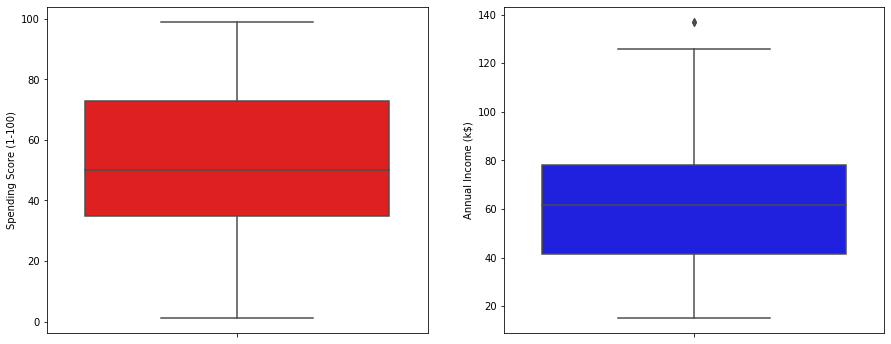

In [10]:
#Box plots
plt.figure(figsize = (15,6))

plt.subplot(1,2,1)
sns.boxplot(y=df['Spending Score (1-100)'],color='red')

plt.subplot(1,2,2)
sns.boxplot(y=df['Annual Income (k$)'],color='blue')

plt.show()

#### Gender Distirbution

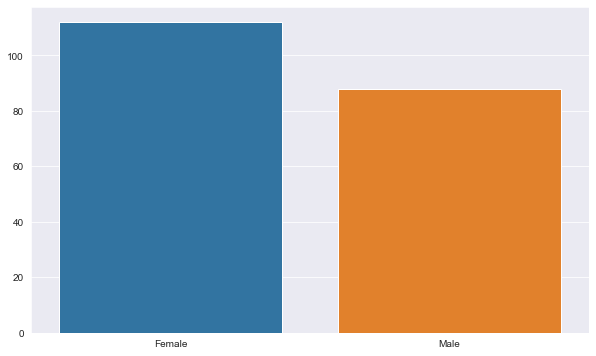

In [17]:
genders = df['Gender'].value_counts()
sns.set_style("darkgrid")

plt.figure(figsize = (10,6))
sns.barplot(x=genders.index , y = genders.values)
plt.show()

#### Age wise distribution

In [22]:
age_18_25 =  df['Age'][(df['Age'] <= 25 ) & (df['Age'] >= 18 )]
age_26_35 = df['Age'][(df['Age'] <= 35 ) & (df['Age'] >= 26 )]
age_36_45 = df['Age'][(df['Age'] <= 45 ) & (df['Age'] >= 36 )]
age_46_55 = df['Age'][(df['Age'] <= 55 ) & (df['Age'] >= 46 )]
age_above_55 = df['Age'][df['Age'] >= 55 ]

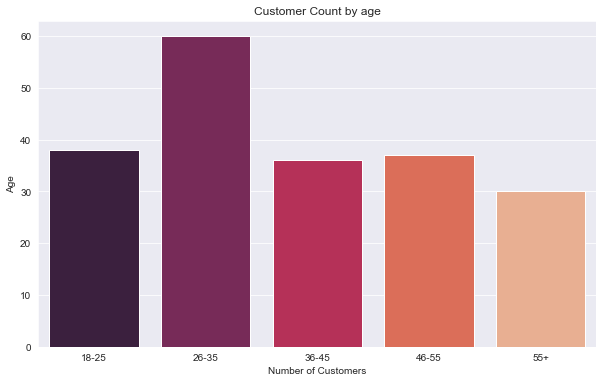

In [28]:
x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age_18_25),len(age_26_35),len(age_36_45),len(age_46_55),len(age_above_55)]

plt.figure(figsize = (10,6))
sns.barplot(x=x , y = y,palette='rocket')
plt.title("Customer Count by age")
plt.ylabel("Age")
plt.xlabel("Number of Customers")
plt.show()

In [29]:
from sklearn.cluster import KMeans

### K = 4

In [32]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df.iloc[:,1:])
print('Inertia : ',kmeans.inertia_)

Inertia :  104366.15145556198


In [33]:
kmeans.labels_

array([3, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

#### K = 3

In [34]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df.iloc[:,1:])
print('Inertia : ',kmeans.inertia_)

Inertia :  143342.751571706


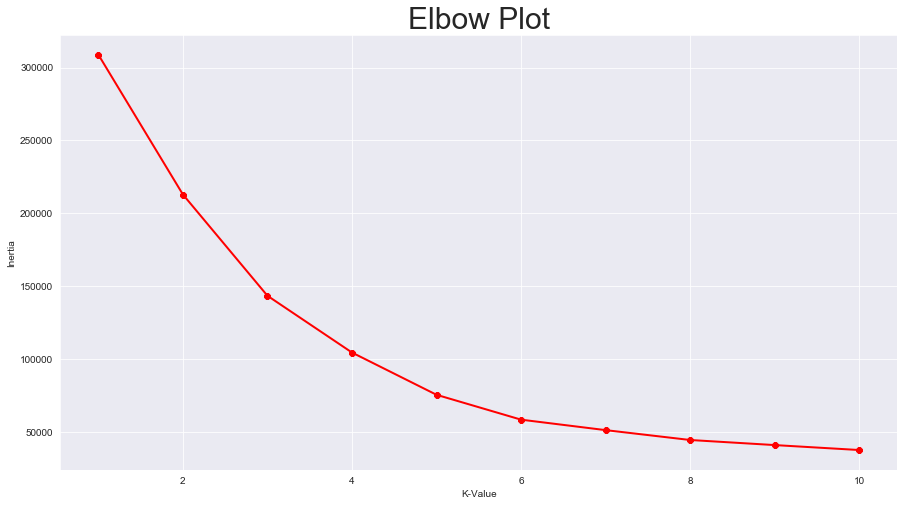

In [36]:
inertia = []
for k in range(1,11):    
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df.iloc[:,1:])
    inertia.append(kmeans.inertia_)
    
plt.figure(figsize = (15,8))
plt.plot(range(1,11),inertia,linewidth=2,color="red",marker="8")
plt.title("Elbow Plot",size=30)
plt.ylabel("Inertia")
plt.xlabel("K-Value")
plt.show()

In [37]:
#Re Cluster
kmeans = KMeans(n_clusters=3)
kmeans.fit(df.iloc[:,1:])
df['Cluster'] = kmeans.labels_
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,Male,19,15,39,2
1,Male,21,15,81,2
2,Female,20,16,6,2
3,Female,23,16,77,2
4,Female,31,17,40,2
...,...,...,...,...,...
195,Female,35,120,79,0
196,Female,45,126,28,1
197,Male,32,126,74,0
198,Male,32,137,18,1


#### Profiling the clusters

In [38]:
df.Cluster.value_counts()

2    123
0     39
1     38
Name: Cluster, dtype: int64

In [40]:
df[df['Cluster']==0].describe()

,Age,Annual Income (k$),Spending Score (1-100),Cluster
count,39.000000,39.000000,39.000000,39.0
mean,32.692308,86.538462,82.128205,0.0
std,3.728650,16.312485,9.364489,0.0
min,27.000000,69.000000,63.000000,0.0
25%,30.000000,75.500000,74.500000,0.0
50%,32.000000,79.000000,83.000000,0.0
75%,35.500000,95.000000,90.000000,0.0
max,40.000000,137.000000,97.000000,0.0


In [42]:
df[df['Cluster']==0].describe().loc[['mean']]

,Age,Annual Income (k$),Spending Score (1-100),Cluster
mean,32.692308,86.538462,82.128205,0.0


The above cluster represents customers with high income and high spending scores

In [43]:
df[df['Cluster']==1].describe().loc[['mean']]

,Age,Annual Income (k$),Spending Score (1-100),Cluster
mean,40.394737,87.0,18.631579,1.0


The above cluster represents customers with high income and low spending scores

In [45]:
df[df['Cluster']==2].describe().loc[['mean']]

,Age,Annual Income (k$),Spending Score (1-100),Cluster
mean,40.325203,44.154472,49.829268,2.0


The above cluster represents customers with medium income and low medium scores